In [31]:
import numpy as np
import pandas as pd
from scipy import stats
import scipy.cluster.hierarchy as hac
import matplotlib.pyplot as plt
import networkx as nx
plt.rcParams['figure.dpi']=100

In [27]:
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)


In [5]:
from matplotlib.pyplot import cm

In [6]:
pop_df=pd.read_csv('normalization/Population_filtered.csv',index_col=0)
gdp_df=pd.read_csv('normalization/GDP_filtered.csv',index_col=0)

In [7]:
af_df=pd.read_csv('af_orig_country_year.csv')
af_df=af_df.rename(columns={'Unnamed: 0':'country.value','Unnamed: 1':'date'})
af_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7564 entries, 0 to 7563
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country.value  7564 non-null   object 
 1   date           7564 non-null   int64  
 2   af_in_pr       3512 non-null   float64
 3   af_in_vl       3512 non-null   float64
 4   af_ex_pr       4694 non-null   float64
 5   af_ex_vl       4697 non-null   float64
 6   af_in_pr2      3512 non-null   float64
 7   af_in_vl2      3512 non-null   float64
 8   af_ex_pr2      4694 non-null   float64
 9   af_ex_vl2      4697 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 591.1+ KB


In [8]:
af_countries=af_df['country.value'].unique()
pop_countries=pop_df['country.value'].unique()
intersc=set(af_countries).intersection(pop_countries)
print('Number countries in af:', len(af_countries))
print('Number countries in pop:',len(pop_countries))
print('Number of countires in intersection:',len(intersc))

Number countries in af: 244
Number countries in pop: 217
Number of countires in intersection: 181


In [9]:
d_af_intersc=set(af_countries)-intersc
d_pop_intersc=set(pop_countries)-intersc
print('leftover countires of population data:',len(d_pop_intersc))
print('leftover countires of af data:',len(d_af_intersc))

leftover countires of population data: 36
leftover countires of af data: 63


In [10]:
concurrent_af_df=af_df[af_df['country.value'].isin(intersc)]
concurrent_gdp_df=gdp_df[gdp_df['country.value'].isin(intersc)]
concurrent_pop_df=pop_df[pop_df['country.value'].isin(intersc)]

In [11]:
for i,j in zip(np.sort(list(d_af_intersc)),np.sort(list(d_pop_intersc))):
    print(i,'--------',j)

Anguilla -------- Bahamas, The
Bahamas -------- Bolivia
Belgium-Luxembourg -------- Channel Islands
Bolivia (Plurinational State of) -------- China
Bouvet Island -------- Congo, Dem. Rep.
British Indian Ocean Territory -------- Congo, Rep.
China, Hong Kong SAR -------- Cote d'Ivoire
China, Macao SAR -------- Curacao
China, Taiwan Province of -------- Czech Republic
China, mainland -------- Egypt, Arab Rep.
Christmas Island -------- Gambia, The
Cocos (Keeling) Islands -------- Hong Kong SAR, China
Congo -------- Iran, Islamic Rep.
Cook Islands -------- Isle of Man
Czechia -------- Korea, Dem. People’s Rep.
Czechoslovakia -------- Korea, Rep.
Côte d'Ivoire -------- Kosovo
Democratic People's Republic of Korea -------- Kyrgyz Republic
Democratic Republic of the Congo -------- Lao PDR
Egypt -------- Macao SAR, China
Ethiopia PDR -------- Micronesia, Fed. Sts.
Falkland Islands (Malvinas) -------- Moldova
French Guiana -------- Northern Mariana Islands
Gambia -------- Sint Maarten (Dutch par

### TODO: Assess the problem of country names.

For now, I'm going to only work with concurrent countries of both datasets (181)

In [12]:
af_expr_piv=concurrent_af_df.pivot(index='country.value',columns='date',values='af_ex_pr')
gdp_piv=concurrent_gdp_df.pivot(index='country.value',columns='date',values='value')
pop_piv=concurrent_pop_df.pivot(index='country.value',columns='date',values='value')

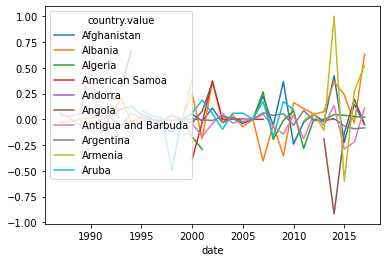

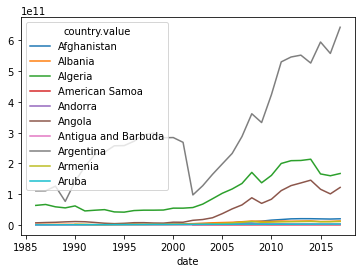

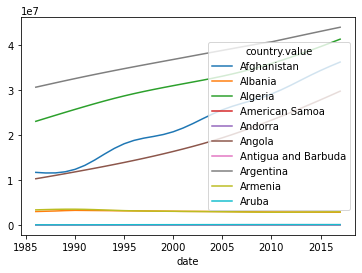

In [13]:
n=10
leg=1
af_expr_piv.transpose().iloc[:,:n].plot(legend=leg)
gdp_piv.transpose().iloc[:,:n].plot(legend=leg)
pop_piv.transpose().iloc[:,:n].plot(legend=leg)

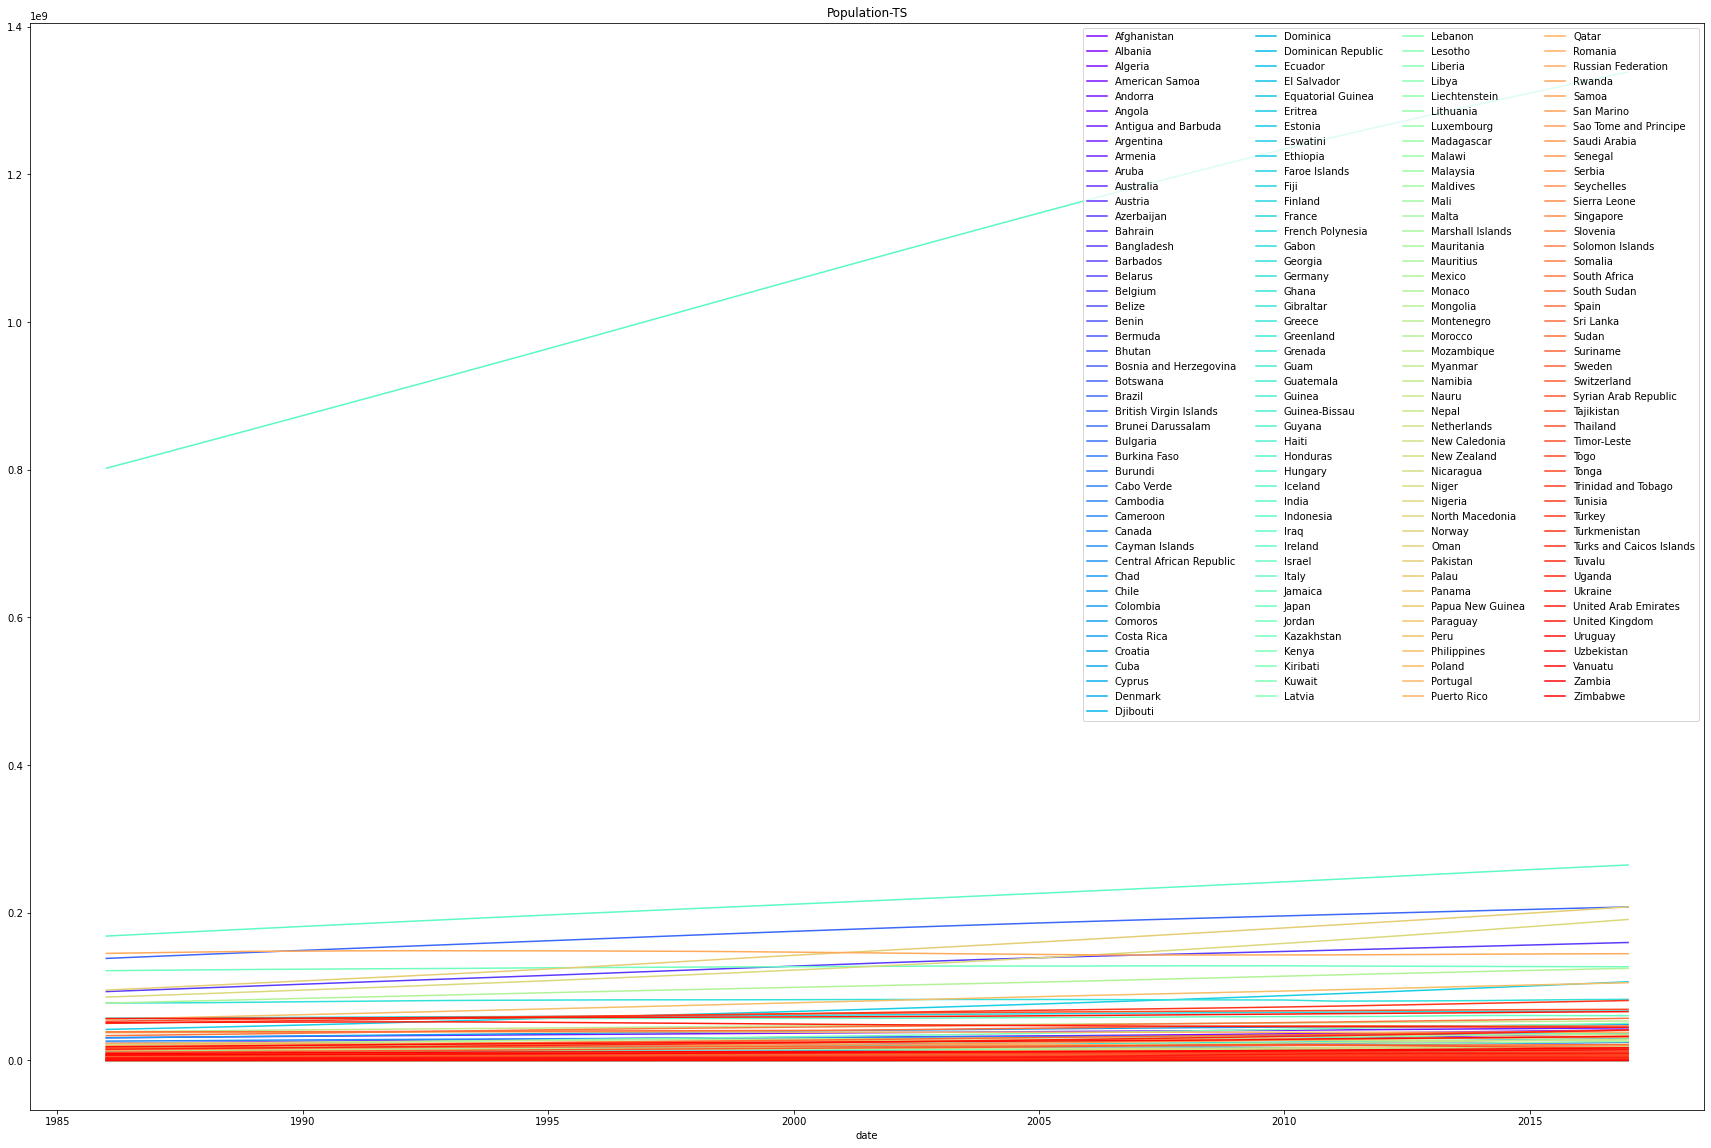

In [35]:
fig,ax=plt.subplots(figsize=(30,20))
color=iter(cm.rainbow(np.linspace(0,1,pop_piv.shape[0])))
pop_piv.transpose().plot(ax=ax,color=color)
ax.set_title("Population-TS")
ax.legend(ncol=4)
# plt.savefig('pop_ts.png')

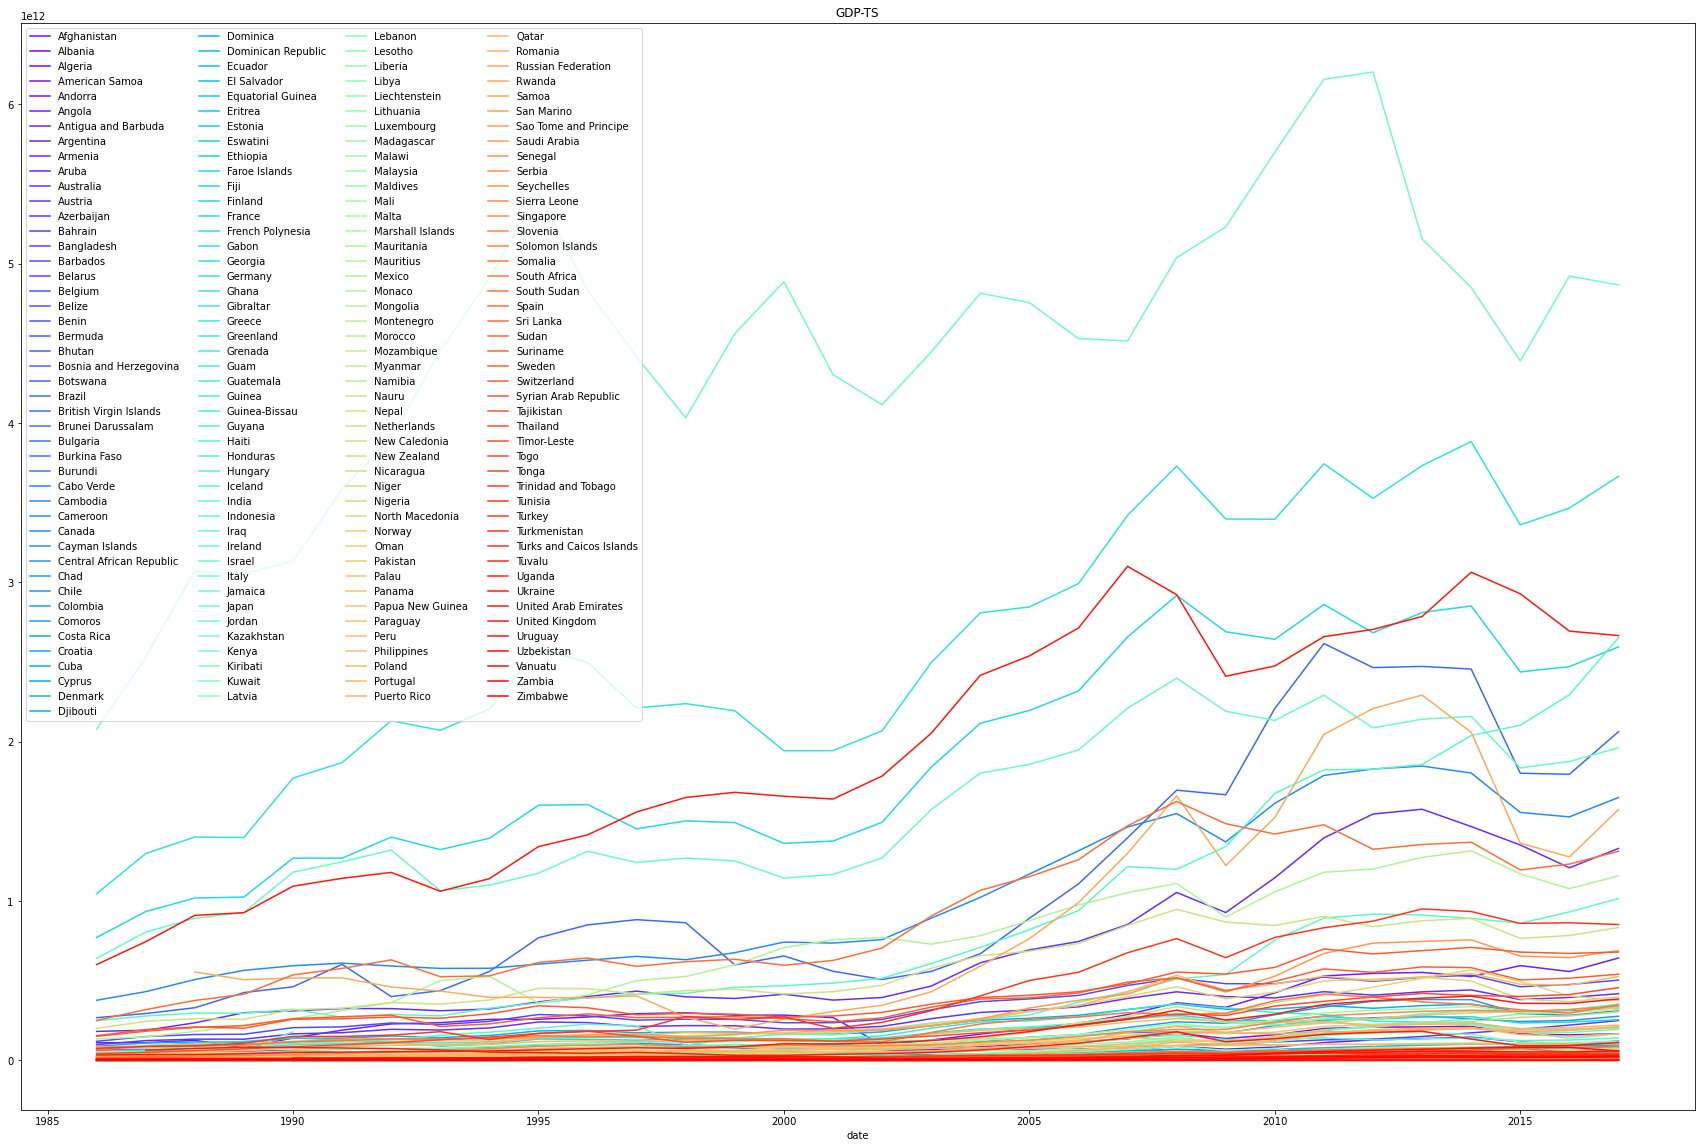

In [33]:
fig,ax=plt.subplots(figsize=(30,20))
color=iter(cm.rainbow(np.linspace(0,1,gdp_piv.shape[0])))
gdp_piv.transpose().plot(ax=ax,color=color)
ax.set_title("GDP-TS")
ax.legend(ncol=4)
# plt.savefig('gdp_ts.png')

In [14]:
from scipy.spatial.distance import pdist,squareform

In [15]:
af_expr_piv=af_expr_piv.dropna()

In [16]:
af_expr_piv

date,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
country.value,,,,,,,,,,,,,,,,,,,,,
Albania,-0.032625,-0.023701,0.003823,0.009714,0.034280,0.015361,0.209227,-0.025580,0.022473,-0.002762,...,-0.052185,-0.354207,0.163011,0.103946,0.050715,0.073256,0.366432,0.239227,-0.036586,0.630691
Argentina,0.057432,0.005285,-0.057614,-0.103566,0.000777,0.012678,-0.063151,0.062116,0.004706,0.000714,...,0.037198,0.053668,-0.058509,0.084454,-0.010625,-0.016308,0.006195,-0.064421,-0.092143,-0.082997
Australia,0.003872,0.023733,-0.094618,-0.041198,0.011594,0.001247,-0.007309,-0.027750,-0.011820,0.006731,...,0.038566,-0.043268,-0.051604,0.009915,-0.003640,-0.001738,0.087508,0.101362,-0.112452,0.062925
Austria,-0.025672,0.026568,-0.001424,0.022210,-0.020222,0.017819,-0.142879,0.218473,-0.024125,-0.003386,...,-0.034616,-0.007508,-0.003375,0.051567,-0.012989,-0.022923,-0.022272,0.020530,-0.056160,0.123475
Brazil,-0.001869,-0.014178,-0.023662,-0.038443,0.016825,-0.004332,-0.040160,-0.049115,-0.013421,-0.003529,...,-0.070060,-0.005217,0.033847,-0.042260,-0.019957,0.028604,-0.112065,-0.013432,-0.074545,-0.286147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United Arab Emirates,-0.017044,0.019351,-0.023953,0.029579,-0.013457,-0.013899,0.034811,-0.035168,0.011300,-0.000861,...,-0.022974,0.075113,0.144547,-0.070864,0.002400,0.012832,-0.130096,0.100967,0.036077,-0.093441
United Kingdom,-0.018635,0.005765,0.055771,0.047051,0.031627,0.006095,0.029592,0.035126,0.008308,0.010094,...,0.001140,0.112580,0.032358,0.005543,0.017368,0.023952,0.020624,0.096830,0.113595,0.073121
Uruguay,-0.049409,0.027389,0.055310,-0.092009,-0.007052,-0.007707,0.008664,0.132564,-0.007870,0.011737,...,0.116747,-0.062003,0.054216,0.035061,0.057140,-0.004189,-0.035661,0.008509,0.157654,0.034801


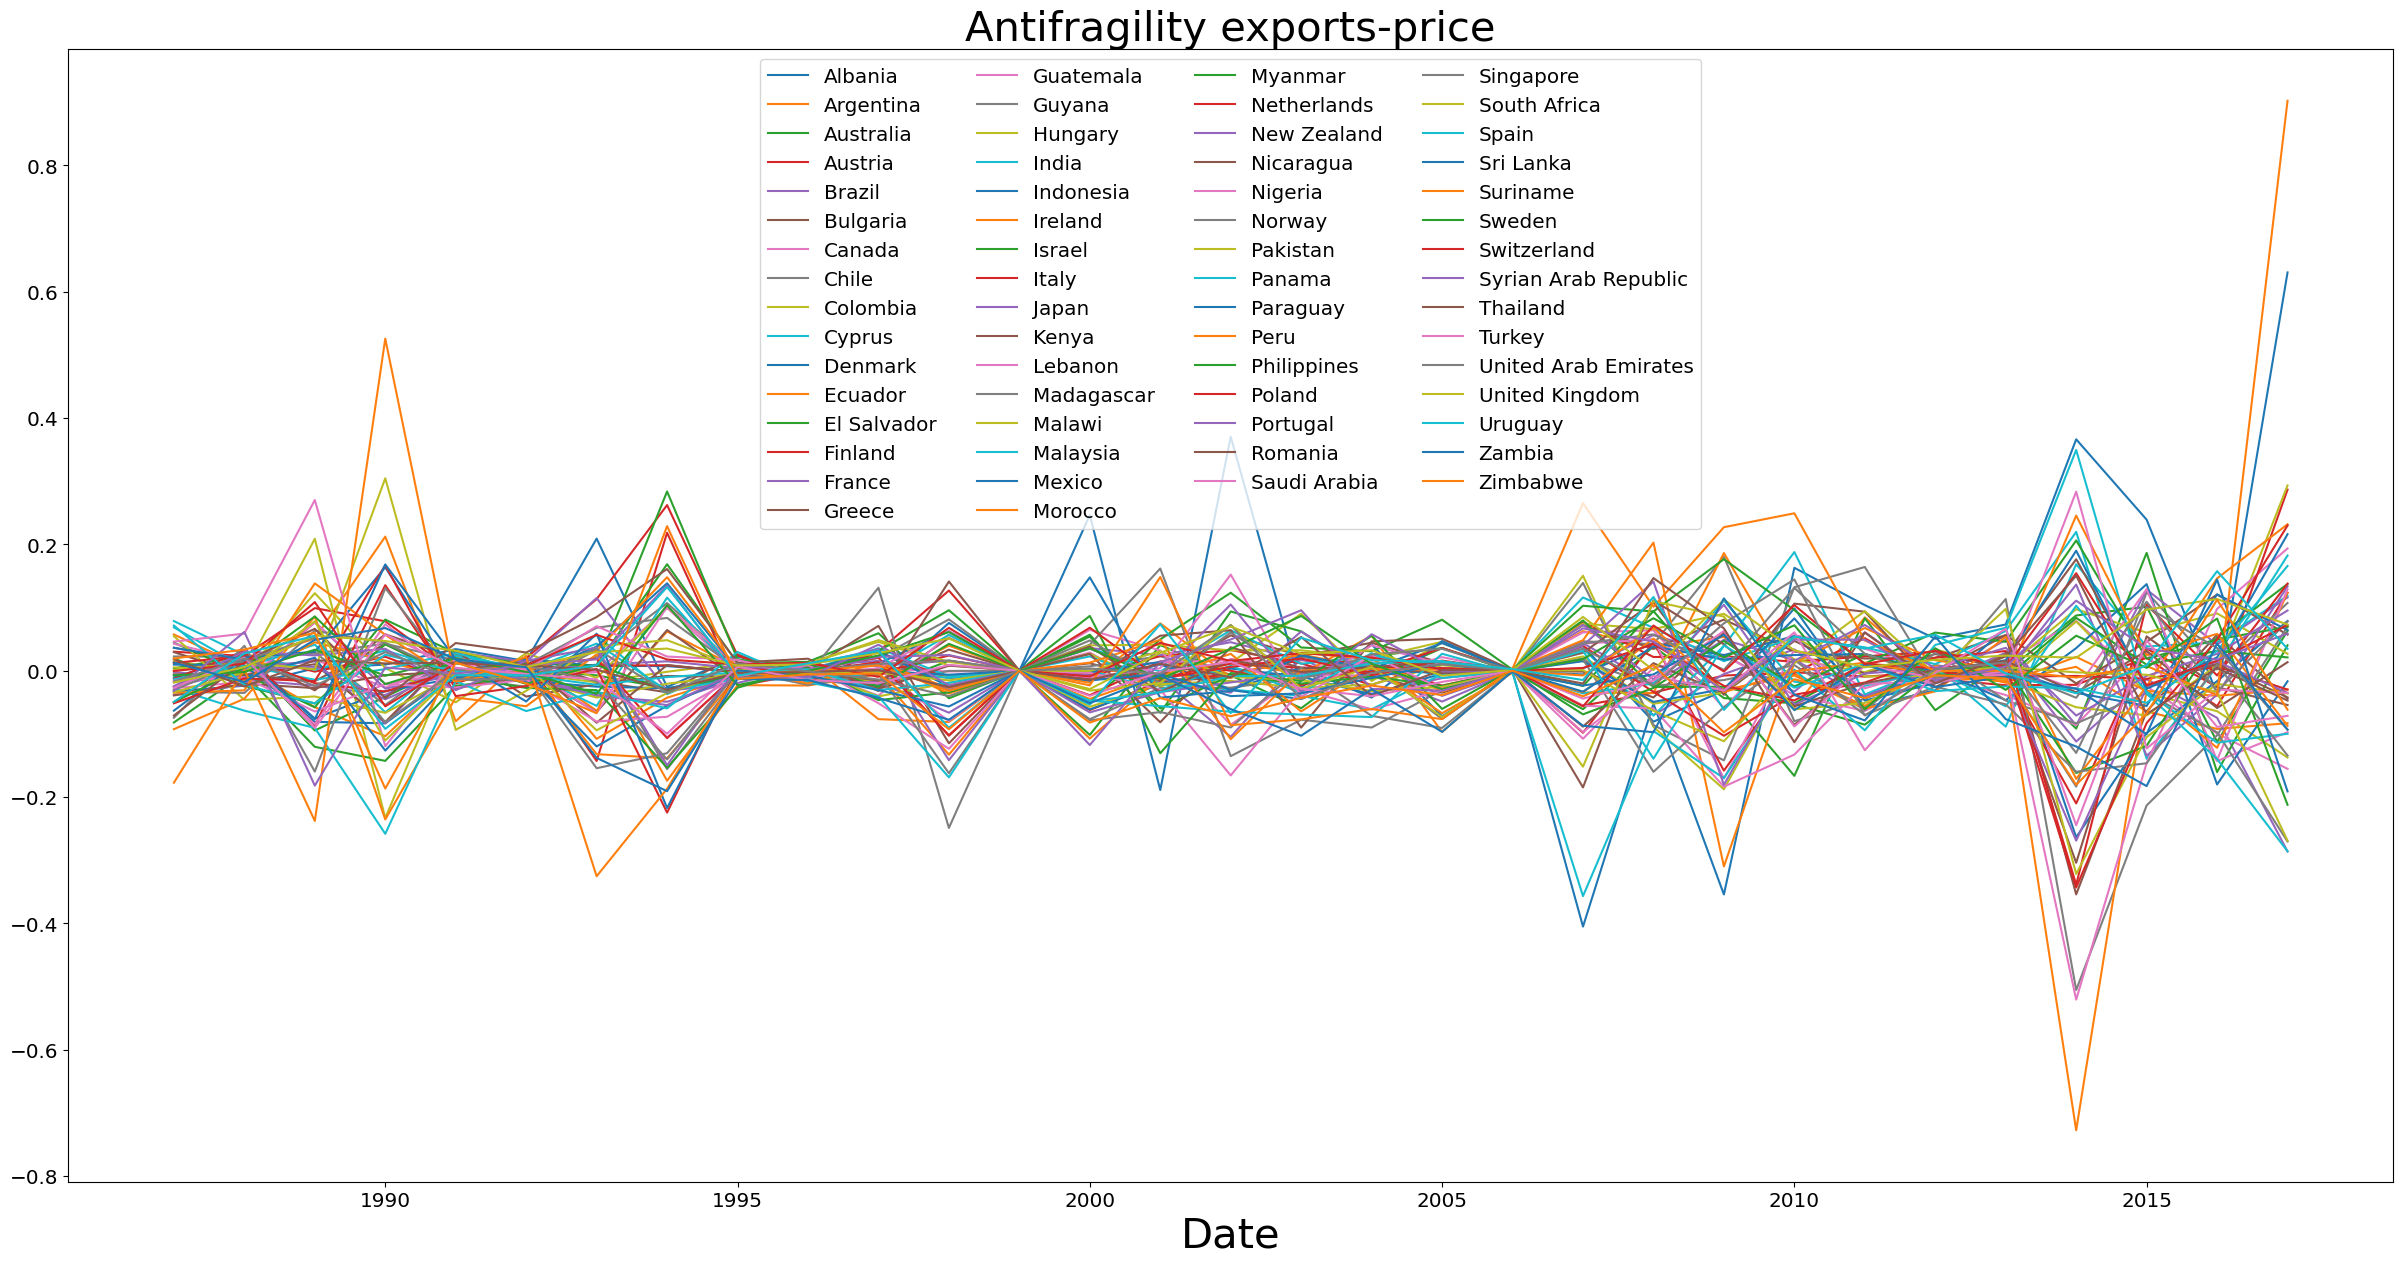

In [32]:
fig,ax=plt.subplots(figsize=(30,15))
af_expr_piv.transpose().plot(ax=ax)
ax.legend(ncol=4)
ax.set_title("Antifragility exports-price",fontsize=30)
ax.set_xlabel('Date',fontsize=30)
plt.savefig('TS_afex_pr.png')

In [33]:
distance_corr=squareform(pdist(af_expr_piv,metric='correlation'))

In [34]:
distance_corr.shape

(62, 62)

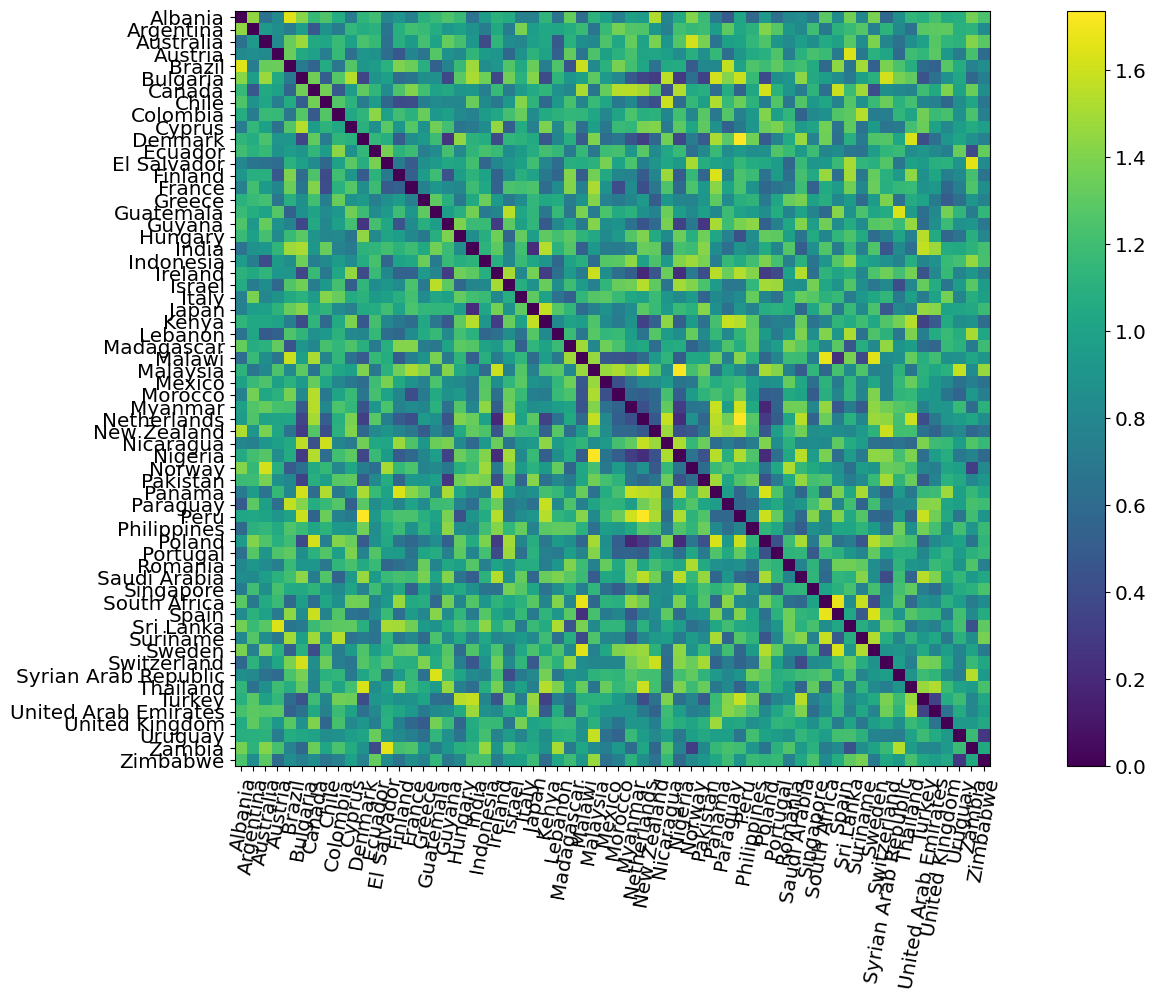

In [39]:
fig,ax=plt.subplots(figsize=(20,10))
plt.imshow(distance_corr)
plt.colorbar()
ax.set_xticks(np.arange(len(af_expr_piv.index)))
ax.set_yticks(np.arange(len(af_expr_piv.index)))
ax.set_xticklabels(af_expr_piv.index)
ax.set_yticklabels(af_expr_piv.index)
plt.setp(ax.get_xticklabels(), rotation=80, ha="right",
         rotation_mode="anchor");
plt.savefig('corr_matrix.png')